# EXOPLANET EXPLORATION
RESEARCH TEAM --- Chiem Oguayo + Nate Ehat


# INTRODUCTION

<h5>
Exploring space and discovering other world's has been a grand quest for quite some time now. One that was rejuvenated by the Kepler Mission. The objective of the Kepler Mission is to survey the structure and diversity of planetary systems, in hopes of discovering Earth-like planets. In doing so the Kepler telescope collects information on planetary systems such as planet size, radii, mass, size of the star, temperature of the star, all to determine whether it is a habitable planet. This project aims to perform a similar task. However, this team does not have nearly the funds to send a telescope into space like NASA does, so a different and low budget method was applied. This project uses two machine learning algorithm, logistic regression and MLP classifier to confirm whether an object of interest found by the Kepler telescope is indeed a planet. The target variable is the 'soltype' which gives the Kepler disposition, whether or no the object of interest was confirmed to be a planet or just a candidate.




## MISSION DATA

In [ ]:
# DATA DICTIONARY
# COLUMN CODES:
  # st = Star
  # pl = Planet
  # sy = System

# PLANET COLUMNS:
  # pl_
  # pl_
  # pl_

# SOLAR COLUMNS:
  # st_age = age
  # st_rad = radius
  # st_mass = mass
  # st_lum = luminosity
  # st_logg = surface gravity = log10(cm/sec**2)
  # st_met = Iron/Hydrogen = Fe/H

# LOCATION COLUMNS:
  # ra = Right Ascension
  # dec = Declination
  # glon = galactic longitude
  # glat = galactic latitude


# Other variables to consider:
  # planet equilibrium temperature - deleted column?
  # stellar density ??
  # Number of Moons (may have many NA values)


# Parsec (PC) - unit of length used to measure the large distances to astronomical objects outside the Solar System
  # Approximately equal to:
    # 3.26 light-years
    # 206,000 astronomical units
    # 30.9 trillion kilometres

## BACKGROUND
Outlined below is a brief summary of critical missions, instruments, telescopes, or methods utilized to collect primary planetary observations which comprise CalTech's open-source Exoplanet Archive:

IMAGING DATA - TRANSIT / EMISSION / MAPPING
* Kepler (2009-2018)
  * First space mission to search for Earth-sized or smaller planets within the habitable zones of nearby stars in Earth's galaxy.
* K2 (2018-Present)
  * Continuation of Kepler's exoplanet discoveries and an expansion into new and exciting astrophysical observations.
* TESS (2018-Present)
  * Transiting Exoplanet Survey Satellite
  * Surveying the sky to find transiting exoplanets around the brightest stars near Earth.
* James Webb Space Telescope (2021-Present)
  * Advanced instrument capabilities will allow for enhanced imaging and mapping of the visible universe

SPECTROGRAPHY DATA - TRANSIT / EMISSION
* Hubble Space Telescope [NASA]
  * Wide-Field Camera
* Spitzer Space Telescope [NASA]
  * Infrared Array Camera (IRAC)
  * Infrared Spectrograph (IRS)
* Hale Telescope [CalTech]
  * Wide-Field Infrared Camera (WIRC)
* CARMENES - Calar Alto high-Resolution search for M dwarfs with Exoearths with Near-infrared and optical Echelle Spectrographs
* HADES - HArps-n red Dwarf Exoplanet Survey

DIRECT IMAGING
* NRM, NACO, NICS, IRCS, SPHERE, SIMON

MICRO-LENSING
* Various Telescopic Instruments

PLANNED MISSIONS:
* Nancy Grace Roman Space Telescope [2027]
* ARIEL - European Space Agency [2029]

# CONFIGURATION

## LIBRARY IMPORT

In [1]:
# LIBRARY IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as stats
import statistics

import requests
from bs4 import BeautifulSoup
import json
import time
import nltk
import re
import datetime

%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#from sklearn.decomposition import PCA

from google.colab import drive
import sys
import os

#import plotly as ply
#import plotly.express as px

print("\nIMPORT SUCCESS")


IMPORT SUCCESS


In [2]:
# Mount Google Drive
drive.mount('drive')
#drive.mount('/content/drive')

# Absolute path of current folder
abspath_curr = '/content/drive/My Drive/GWU/ML-EXOPLANETS'

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [3]:
# RANDOM SEED
random_seed = 42

# RANDOM SEED - TensorFlow
tf.random.set_seed(random_seed)

# RANDOM SEED - NumPy
np.random.seed(random_seed)

In [4]:
import warnings
warnings.simplefilter(action='ignore') #, category=FutureWarning

## DATA IMPORT

Importing two data sets from CalTech Archives, though analysis herein will rely primarily on `Planetary Systems` archive
* `Planetary Systems`:
  * 32,329 observations
* `Exoplanets`:
  * 5,014 observation (confirmed Exoplanets)

In [5]:
planetary_systems = abspath_curr + '/data/NASA_Planetary_Systems-4-24-22'
exoplanets = abspath_curr + '/data/NASA_Exoplanets-4-22-22'

planetary_systems = pd.read_excel(planetary_systems + '.xlsx', sheet_name="PLANETARY SYSTEMS")
#planetary_systems = pd.read_csv(planetary_systems + '.csv', index_col='pl_name')

exoplanets = pd.read_excel(exoplanets + '.xlsx', sheet_name="EXOPLANETS")
#exoplanets = pd.read_csv(exoplanets + '.csv', index_col='pl_name')

print("\nIMPORT SUCCESS")


IMPORT SUCCESS


# PRE-PROCESSING

In [6]:
print(planetary_systems.info())
print('*'*50)
print(exoplanets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32329 entries, 0 to 32328
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loc_rowid        32329 non-null  int64  
 1   pl_name          32329 non-null  object 
 2   hostname         32329 non-null  object 
 3   default_flag     32329 non-null  int64  
 4   sy_snum          32329 non-null  int64  
 5   sy_pnum          32329 non-null  int64  
 6   pl_controv_flag  32329 non-null  int64  
 7   discoverymethod  32329 non-null  object 
 8   disc_year        32329 non-null  int64  
 9   disc_locale      32329 non-null  object 
 10  disc_facility    32329 non-null  object 
 11  disc_telescope   32329 non-null  object 
 12  disc_instrument  32329 non-null  object 
 13  soltype          32329 non-null  object 
 14  pl_orbper        29521 non-null  float64
 15  pl_orbsmax       18141 non-null  float64
 16  pl_rade          22688 non-null  float64
 17  pl_radj     

## OUTLIERS
  * Detection, filtering, and ejection of outlier values within data sets
  * High sensitivity towards avoiding overly stringent filters to preserve initial scope of data; cannot freely omit official observations
  * Adjusting filters in respect to trial + error boxplots (visualizations below)

In [7]:
## NOT IN USE - OVERLY PUNITIVE FILTERS DUE TO GAPS IN DATA

## OUTLIER DETECTION / FILTERING / THRESHOLDS

# Filtering out data where planet observation period exceeds 3 (__)
#planetary_systems = planetary_systems[planetary_systems['pl_orbper'] <= 3.5]

# Filtering out data where host star radius exceeds 35x the radius of Earth's Sun
  #planetary_systems = planetary_systems[planetary_systems['st_rad'] <= 35] #60 #35

# Filtering out data where host star mass exceeds 10x the mass of Earth's Sun
  #planetary_systems = planetary_systems[planetary_systems['st_mass'] <= 20] #10

# Filtering out data where host star temperature exceeds 25,000K
  #planetary_systems = planetary_systems[planetary_systems['st_teff'] <= 25000] #32999


# Filtering out data where host star age exceeds 10BYA
  # planetary_systems = planetary_systems[planetary_systems['st_age'] <= 10] #32999

In [9]:
print(planetary_systems.info())
print('*'*50)
print(exoplanets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32329 entries, 0 to 32328
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loc_rowid        32329 non-null  int64  
 1   pl_name          32329 non-null  object 
 2   hostname         32329 non-null  object 
 3   default_flag     32329 non-null  int64  
 4   sy_snum          32329 non-null  int64  
 5   sy_pnum          32329 non-null  int64  
 6   pl_controv_flag  32329 non-null  int64  
 7   discoverymethod  32329 non-null  object 
 8   disc_year        32329 non-null  int64  
 9   disc_locale      32329 non-null  object 
 10  disc_facility    32329 non-null  object 
 11  disc_telescope   32329 non-null  object 
 12  disc_instrument  32329 non-null  object 
 13  soltype          32329 non-null  object 
 14  pl_orbper        29521 non-null  float64
 15  pl_orbsmax       18141 non-null  float64
 16  pl_rade          22688 non-null  float64
 17  pl_radj     

## VARIABLE ASSIGNMENT

In [126]:
## PLANETARY SYSTEMS VARIABLES

## USED FOR MODELING
psystem_nums = planetary_systems[['soltype', 
                                  'sy_snum', 'sy_pnum', 'sy_dist', #'default_flag', #'ttv_flag', # 'loc_rowid', 'pl_name', #'disc_year', 
                                  'discoverymethod', 'disc_facility', 'disc_telescope', 'disc_instrument', 
                                  'st_teff', 'st_rad', 'st_mass', 'st_logg', #'st_lum', #'st_age', 'st_met'
                                  'pl_orbper', 'pl_orbsmax', 'pl_orbincl', 'pl_eqt', #'pl_insol', #'pl_controv_flag', #'pl_rade',
#                                  'ra', 'dec', 'glat', 'glon', 
                                  'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag'
                                  ]]

## USED FOR VISUALIZATION
psystem_all = planetary_systems[['loc_rowid', 'pl_name', 'hostname', 'default_flag', 'sy_snum',
                      'sy_pnum', 'pl_controv_flag', 'discoverymethod', 'disc_year',
                      'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument',
                      'soltype', 'pl_orbper', 'pl_orbsmax','pl_orbincl',# 'pl_insol', 'pl_eqt', 
                      #'pl_rade', 'pl_radj', 'pl_bmasse', 'pl_bmassj', 'pl_orbeccen', 'st_spectype',  
                      'st_teff', 'st_rad', 'st_mass', 'st_met', 'st_logg', 'st_age', #'st_lum', 
                      'ra', 'dec', 'glat', 'glon', 'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag'
                      ]]

psystem_categorical = planetary_systems[['loc_rowid', 'pl_name', 'default_flag', #'host_name', 'pl_controv_flag',
                                         'discoverymethod', 'disc_year', 'disc_facility', 'disc_telescope', 'disc_instrument', #'disc_method', 
                                          'ra', 'dec', 'glat', 'glon',
                                          'st_age', 'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag',
                                         ]]

In [12]:
print(psystem_nums.info())
print('*'*50)
print(psystem_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32329 entries, 0 to 32328
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   soltype          32329 non-null  object 
 1   sy_snum          32329 non-null  int64  
 2   sy_pnum          32329 non-null  int64  
 3   sy_dist          31542 non-null  float64
 4   discoverymethod  32329 non-null  object 
 5   disc_facility    32329 non-null  object 
 6   disc_telescope   32329 non-null  object 
 7   disc_instrument  32329 non-null  object 
 8   st_teff          30471 non-null  float64
 9   st_rad           30617 non-null  float64
 10  st_mass          27952 non-null  float64
 11  st_logg          26957 non-null  float64
 12  pl_orbper        29521 non-null  float64
 13  pl_orbsmax       18141 non-null  float64
 14  pl_orbincl       15337 non-null  float64
 15  pl_eqt           14717 non-null  float64
 16  sy_dist          31542 non-null  float64
 17  sy_vmag     

# EXPLORATORY DATA VIZ

## CREATE DIRECTORY

In [58]:
# Create directory
directory = os.path.dirname(abspath_curr + '/figures/')
if not os.path.exists(directory):
    os.makedirs(directory)

## PLANET DISTRIBUTION

In [59]:
print(psystem_all.columns)
print('*'*50)
print(psystem_nums.columns)
print('*'*50)
print(psystem_categorical.columns)

Index(['loc_rowid', 'pl_name', 'hostname', 'default_flag', 'sy_snum',
       'sy_pnum', 'pl_controv_flag', 'discoverymethod', 'disc_year',
       'disc_locale', 'disc_facility', 'disc_telescope', 'disc_instrument',
       'soltype', 'pl_orbper', 'pl_orbsmax', 'pl_orbincl', 'st_teff', 'st_rad',
       'st_mass', 'st_met', 'st_logg', 'st_age', 'ra', 'dec', 'glat', 'glon',
       'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag'],
      dtype='object')
**************************************************
Index(['soltype', 'sy_snum', 'sy_pnum', 'sy_dist', 'discoverymethod',
       'disc_facility', 'disc_telescope', 'disc_instrument', 'st_teff',
       'st_rad', 'st_mass', 'st_logg', 'pl_orbper', 'pl_orbsmax', 'pl_orbincl',
       'pl_eqt', 'sy_dist', 'sy_vmag', 'sy_kmag', 'sy_gaiamag'],
      dtype='object')
**************************************************
Index(['loc_rowid', 'pl_name', 'default_flag', 'discoverymethod', 'disc_year',
       'disc_facility', 'disc_telescope', 'disc_instrument',

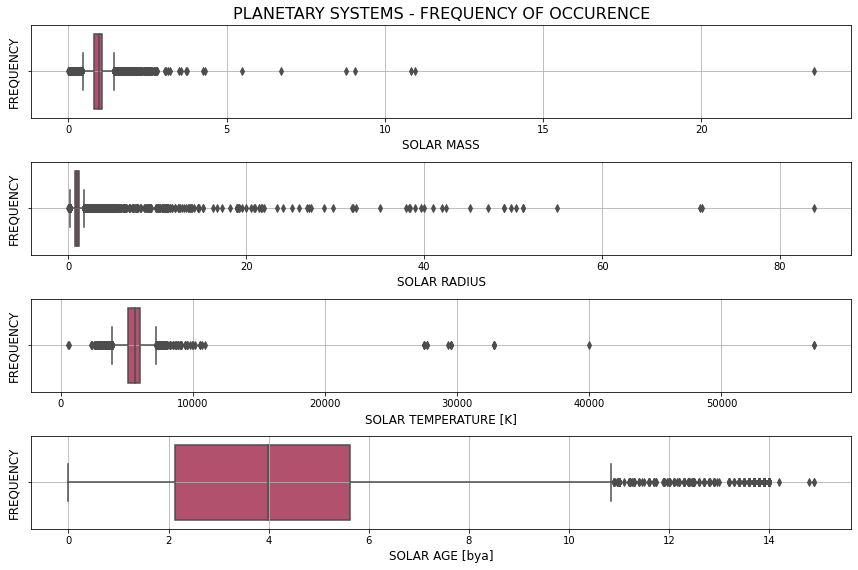

<Figure size 432x288 with 0 Axes>

In [60]:
## PLANETARY SYSTEMS - Observational frequency within data set, by Solar features
#sns.style('fivethirtyeight')

plt.figure(figsize=(12,8))

plt.subplot(411)
sns.boxplot(psystem_all['st_mass'], palette='flare')
plt.title('PLANETARY SYSTEMS - FREQUENCY OF OCCURENCE', fontsize=16)
plt.xlabel('SOLAR MASS', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
#plt.legend(loc='best', title='') #STELLAR AGE (bya)
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(412)
sns.boxplot(psystem_all['st_rad'], palette='flare')
plt.xlabel('SOLAR RADIUS', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
#plt.legend(loc='best', title='') #STELLAR AGE (bya)
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(413)
sns.boxplot(psystem_all['st_teff'], palette='flare')
plt.xlabel('SOLAR TEMPERATURE [K]', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
#plt.legend(loc='best', title='') #STELLAR AGE (bya)
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(414)
sns.boxplot(psystem_all['st_age'], palette='flare')
plt.xlabel('SOLAR AGE [bya]', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
#plt.legend(loc='best', title='') #STELLAR AGE (bya)
plt.grid()
plt.tight_layout(pad=1)

plt.show()
plt.savefig(abspath_curr+'/figures/Box-Dist-Solar.png', dpi=600);

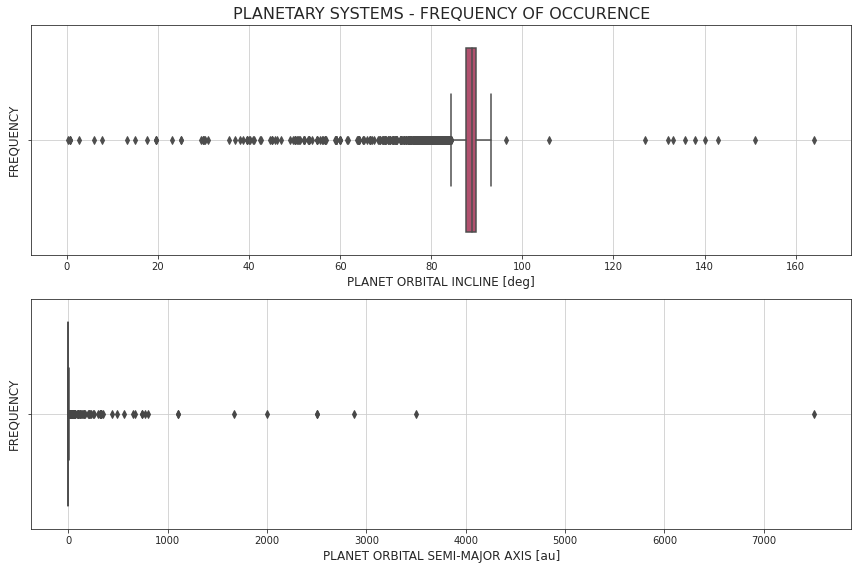

<Figure size 432x288 with 0 Axes>

In [69]:
## PLANETARY SYSTEMS - Observational frequency within data set, by Solar features
sns.set_style('ticks')

plt.figure(figsize=(12,8))

plt.subplot(211)
sns.boxplot(psystem_all['pl_orbincl'], hue=psystem_all['hostname'], palette='flare')
plt.title('PLANETARY SYSTEMS - FREQUENCY OF OCCURENCE', fontsize=16)
plt.xlabel('PLANET ORBITAL INCLINE [deg]', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
#plt.legend(loc='best', title='') #STELLAR AGE (bya)
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(212)
sns.boxplot(psystem_all['pl_orbsmax'], palette='magma')
plt.xlabel('PLANET ORBITAL SEMI-MAJOR AXIS [au]', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
#plt.legend(loc='best', title='') #STELLAR AGE (bya)
plt.grid()
plt.tight_layout(pad=1)

plt.show()

## SOLAR METRICS

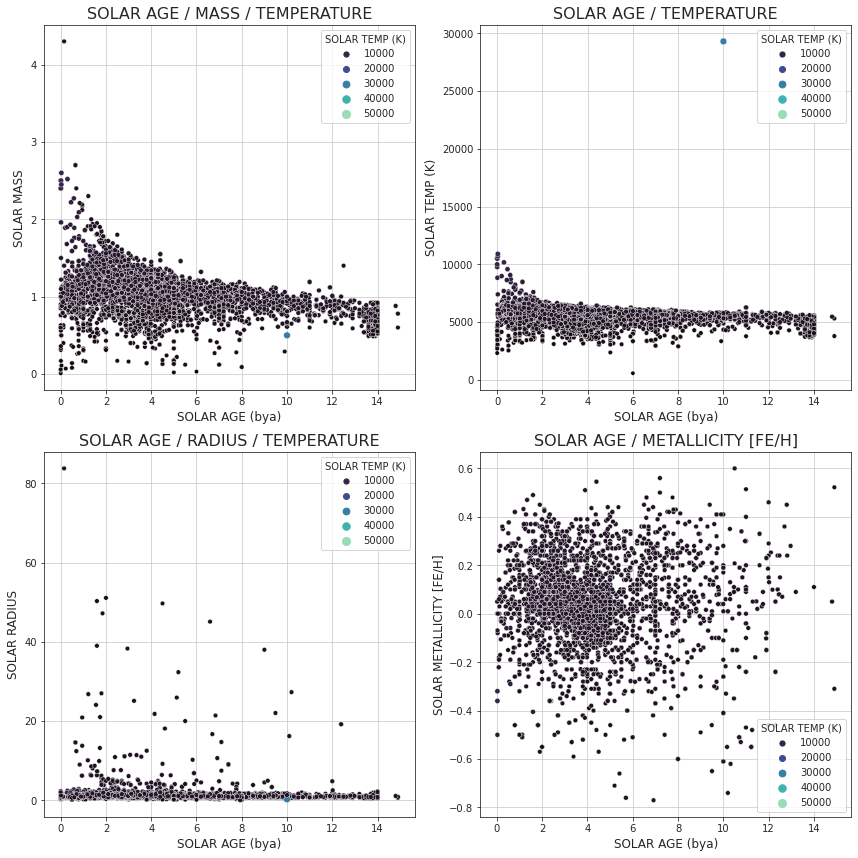

In [107]:
# PLANETARY SYSTEMS - SOLAR RADIUS () / MASS () / TEMPERATURE (K)

plt.figure(figsize=(12,12))

plt.subplot(221)
sns.scatterplot(data=psystem_all, x='st_age', y='st_mass', hue='st_teff', size='st_teff', palette='mako')
plt.title('SOLAR AGE / MASS / TEMPERATURE', fontsize=16)
plt.xlabel('SOLAR AGE (bya)', fontsize=12)
plt.ylabel('SOLAR MASS', fontsize=12)
plt.legend(loc='best', title='SOLAR TEMP (K)')#, title='SOLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(222)
sns.scatterplot(data=psystem_all, x='st_age', y='st_teff', hue='st_teff', size='st_teff', palette='mako')
plt.title('SOLAR AGE / TEMPERATURE', fontsize=16)
plt.xlabel('SOLAR AGE (bya)', fontsize=12)
plt.ylabel('SOLAR TEMP (K)', fontsize=12)
plt.legend(loc='best', title='SOLAR TEMP (K)')#, title='SOLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(223)
sns.scatterplot(data=psystem_all, x='st_age', y='st_rad', hue='st_teff', size='st_teff', palette='mako')
plt.title('SOLAR AGE / RADIUS / TEMPERATURE', fontsize=16)
plt.xlabel('SOLAR AGE (bya)', fontsize=12)
plt.ylabel('SOLAR RADIUS', fontsize=12)
plt.legend(loc='best', title='SOLAR TEMP (K)')#, title='SOLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(224)
sns.scatterplot(data=psystem_all, x='st_age', y='st_met', hue='st_teff', size='st_teff', palette='mako')
plt.title('SOLAR AGE / METALLICITY [FE/H]', fontsize=16)
plt.xlabel('SOLAR AGE (bya)', fontsize=12)
plt.ylabel('SOLAR METALLICITY [FE/H]', fontsize=12)
plt.legend(loc='best', title='SOLAR TEMP (K)')#, title='SOLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.show();

* Graphs above depict solar age relative to other critical measurables of stellar magnitude / activity:
  * Solar Age + Solar Radius
    * `st_age` + `st_radius`
  * Solar Age + Solar Mass
    * `st_age` + `st_mass`
  * Solar Age + Solar Temperature
    * `st_age` + `st_teff`

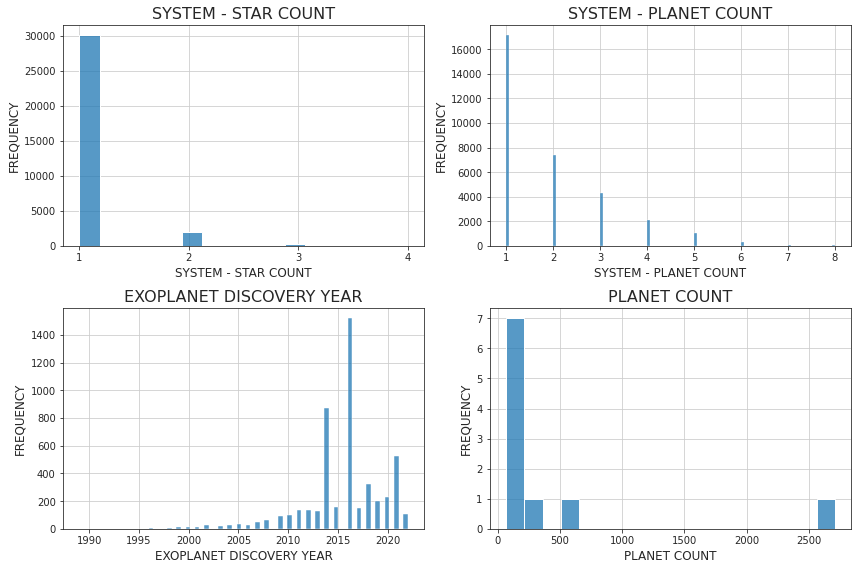

In [103]:
# PLANETARY SYSTEMS - STAR / PLANET COUNT

top10_facility = pd.DataFrame(exoplanets['disc_facility'].value_counts()[:10])
top10_facility
 # 'pl_controv_flag', 'soltype',
 # 'discoverymethod', 'disc_year', 'disc_locale',
 # 'disc_facility', 'disc_telescope', 'disc_instrument'

plt.figure(figsize=(12,8))

plt.subplot(221)
sns.histplot(data=planetary_systems['sy_snum'], palette='mako')
plt.title('SYSTEM - STAR COUNT', fontsize=16)
plt.xlabel('SYSTEM - STAR COUNT', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
plt.xticks(range(1,5,1))
#plt.legend(loc='best')#, title='STELLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(222)
sns.histplot(data=planetary_systems['sy_pnum'], palette='mako')
plt.title('SYSTEM - PLANET COUNT', fontsize=16)
plt.xlabel('SYSTEM - PLANET COUNT', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
#plt.legend(loc='best')#, title='STELLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(223)
sns.histplot(data=exoplanets['disc_year'], palette='mako')
plt.title('EXOPLANET DISCOVERY YEAR', fontsize=16)
plt.xlabel('EXOPLANET DISCOVERY YEAR', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
#plt.legend(loc='best')#, title='STELLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(224)
sns.histplot(data=top10_facility['disc_facility'], palette='mako') #.sort_values(ascending=False)
plt.title('PLANET COUNT', fontsize=16)
plt.xlabel('PLANET COUNT', fontsize=12)
plt.ylabel('FREQUENCY', fontsize=12)
#plt.legend(loc='best')#, title='STELLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.show()

In [106]:
top20_facility = pd.DataFrame(exoplanets['disc_facility'].value_counts()[:25])
top20_facility

,disc_facility
Kepler,2709
K2,537
La Silla Observatory,263
Transiting Exoplanet Survey Satellite (TESS),205
Multiple Observatories,188
W. M. Keck Observatory,182
SuperWASP,113
OGLE,80
HATSouth,73
HATNet,67


## GALACTIC LAT/LON

In [110]:
planetary_systems['soltype']

0        Published Confirmed
1        Published Confirmed
2        Published Confirmed
3        Published Confirmed
4        Published Confirmed
                ...         
32324    Published Confirmed
32325    Published Confirmed
32326    Published Confirmed
32327    Published Confirmed
32328    Published Confirmed
Name: soltype, Length: 32329, dtype: object

In [123]:
confirmed = planetary_systems[planetary_systems['soltype'] == 'Published Confirmed']
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15860 entries, 0 to 32328
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loc_rowid        15860 non-null  int64  
 1   pl_name          15860 non-null  object 
 2   hostname         15860 non-null  object 
 3   default_flag     15860 non-null  int64  
 4   sy_snum          15860 non-null  int64  
 5   sy_pnum          15860 non-null  int64  
 6   pl_controv_flag  15860 non-null  int64  
 7   discoverymethod  15860 non-null  object 
 8   disc_year        15860 non-null  int64  
 9   disc_locale      15860 non-null  object 
 10  disc_facility    15860 non-null  object 
 11  disc_telescope   15860 non-null  object 
 12  disc_instrument  15860 non-null  object 
 13  soltype          15860 non-null  object 
 14  pl_orbper        13058 non-null  float64
 15  pl_orbsmax       5300 non-null   float64
 16  pl_rade          9075 non-null   float64
 17  pl_radj     

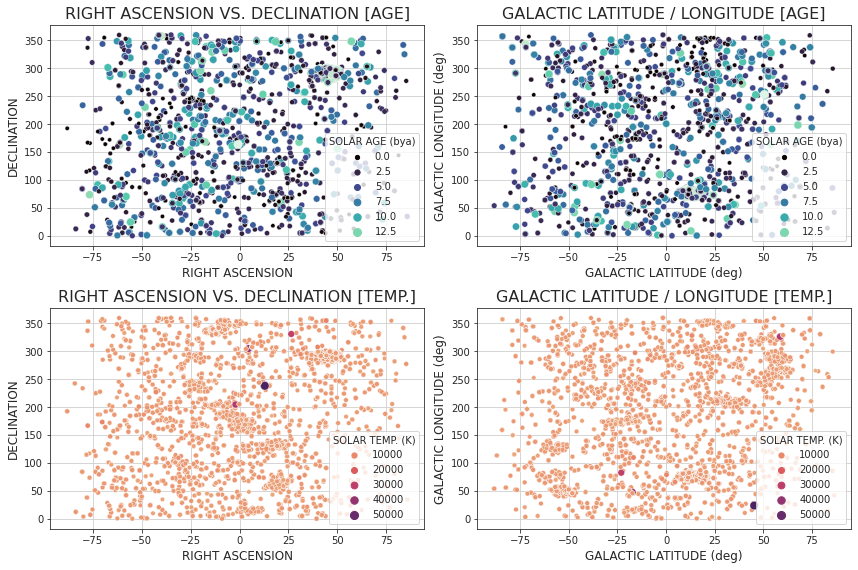

In [108]:
# SOLAR RADIUS () / MASS () / TEMPERATURE (K)

plt.figure(figsize=(12,8))
plt.subplot(221)
sns.scatterplot(data=psystem_all, x='dec', y='ra', hue='st_age', size='st_age', palette='mako')
plt.title('RIGHT ASCENSION VS. DECLINATION [AGE]', fontsize=16)
plt.xlabel('RIGHT ASCENSION', fontsize=12)
plt.ylabel('DECLINATION', fontsize=12)
plt.legend(loc='lower right', title='SOLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

#plt.subplot(222)
sns.scatterplot(data=psystem_all, x='glat', y='glon', hue='st_age', size='st_age', palette='mako')
plt.title('GALACTIC LATITUDE / LONGITUDE [AGE]', fontsize=16)
plt.xlabel('GALACTIC LATITUDE (deg)', fontsize=12)
plt.ylabel('GALACTIC LONGITUDE (deg)', fontsize=12)
plt.legend(loc='lower right', title='SOLAR AGE (bya)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(223)
sns.scatterplot(data=psystem_all, x='dec', y='ra', hue='st_teff', size='st_teff', palette='flare')
plt.title('RIGHT ASCENSION VS. DECLINATION [TEMP.]', fontsize=16)
plt.xlabel('RIGHT ASCENSION', fontsize=12)
plt.ylabel('DECLINATION', fontsize=12)
plt.legend(loc='lower right', title='SOLAR TEMP. (K)')
plt.grid()
plt.tight_layout(pad=1)

plt.subplot(224)
sns.scatterplot(data=psystem_all, x='glat', y='glon', hue='st_teff', size='st_teff', palette='flare')
plt.title('GALACTIC LATITUDE / LONGITUDE [TEMP.]', fontsize=16)
plt.xlabel('GALACTIC LATITUDE (deg)', fontsize=12)
plt.ylabel('GALACTIC LONGITUDE (deg)', fontsize=12)
plt.legend(loc='lower right', title='SOLAR TEMP. (K)')
plt.grid()
plt.tight_layout(pad=1)


plt.show()

* Graphs above depict two separate sets of 'mapping' or location metrics:
  * Declination + Right Ascension
    * `dec` + `ra`
  * Galactic Latitude + Galactic Longitude
    * `glat` + `glon`

* Few clear identifiable patterns or trends aside from observation clustering in a handful of cosmic 'regions'
* Universal chaos is readily apparent across the currently visible universe


# CONCLUSION

The models were successfully built, that were able to predict whether an object of interest would be classified as a candidate or confirmed planet. The random forest model was the better performing better model with an accuracy of 91% and the logistic regression having an accuracy of 78%. So with an accuracy of 91%, the Random forest can be applied to a new dataset, and be expected to perform well. The most important features underwere determined to be pl_eqt(Temperature), pl_radj(planet radius), pl_orbsmax(Orbit Semi-Major Axis), pl_orbincl(planet inclindation), pl_insol(Temperature), meaning that these variables were most impactul the the performance of the model. Also when evaluating the model, we determine the AUC of the best model, to have a value of 0.91. The closer the value is to 1 the better performing we can say our model to be. This value indicates how well our model can differentiate between classes.

# SOURCES / CITATIONS

SOURCES / REFERENCES
* Primary sourcing for data as presented and modeled within analysis is derived from CalTech Exoplanet Archive:
  * Archive Index: https://exoplanetarchive.ipac.caltech.edu/index.html
  * Archive Statistics: https://exoplanetarchive.ipac.caltech.edu/docs/counts_detail.html
  * Exoplanet Data: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars
  * Planetary Systems Data: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS
  * Data Description: https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html
  * Kepler Data: https://www.nasa.gov/mission_pages/kepler/overview/index.html
* Code adopted from:
  * https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/spring_2022/code/p2_shallow_learning/p2_c2_supervised_learning/p2_c2_s3_logistic_regression/case_study/case_study_bcw.ipynb
